In [1]:
import xml.etree.ElementTree as ET

In [2]:
import pandas as pd
df_bird = pd.read_csv('comp4_det_test_bird.txt',sep=' ', names=['filename','trust','x1','y1','x2','y2'])
df_person = pd.read_csv('comp4_det_test_person.txt',sep=' ', names=['filename','trust','x1','y1','x2','y2'])

In [3]:
df_head = df_bird.head()
df_head

filename     trust           x1          y1  \
0   w20190618063144857_319_epoch0_aug0x1  0.999689    85.619110   86.296158   
1  w20190829173008684_697_epoch0_trim1x1  0.048315   965.067932  491.824280   
2   w20190719093725711_310_epoch0_aug0x0  0.986791   166.659790    1.000000   
3   w20190719093725711_310_epoch0_aug0x0  0.011621  1902.622925  416.606079   
4   w20190719093725711_310_epoch0_aug0x0  0.006215  1905.737793  355.440582   

            x2          y2  
0   396.555328  301.851685  
1   984.603577  539.362488  
2   431.274719  156.958115  
3  1920.000000  640.121704  
4  1920.000000  548.323608

In [7]:
df_head.filename

0     w20190618063144857_319_epoch0_aug0x1
1    w20190829173008684_697_epoch0_trim1x1
2     w20190719093725711_310_epoch0_aug0x0
3     w20190719093725711_310_epoch0_aug0x0
4     w20190719093725711_310_epoch0_aug0x0
Name: filename, dtype: object

In [57]:
df_head.insert(1, 'istrue', 0)

In [63]:
df_head.loc[3, 'istrue'] = 1

/home/wootion/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
df_head

filename  istrue     trust           x1  \
0  w20190829173008684_529_epoch0_trim0x0       0  0.012300   528.944336   
1   w20190705043739842_229_epoch0_aug0x0       0  0.850238  1286.066284   
2   w20190705043739842_229_epoch0_aug0x0       0  0.010477   318.009583   
3   w20190618063144857_427_epoch0_aug0x0       1  0.993275   119.210236   
4   w20190805084121403_112_epoch0_aug1x3       0  0.038417     1.228794   

           y1           x2          y2  
0  459.117096   790.892944  842.053833  
1  325.252686  1531.101196  672.331848  
2  290.869904   653.841553  583.918213  
3  127.053558   390.177612  269.967346  
4  600.798218    10.051918  608.000000

In [4]:
#df_bird = df_bird[df_bird.trust>0.5]
#df_person = df_person[df_person.trust>0.5]

In [6]:
df_bird.shape
df_person.shape

(3676, 6)

In [9]:
df_bird['category']='bird'
df_person['category'] = 'person'

In [10]:
df = pd.concat([df_bird,df_person],axis=0)

In [11]:
df.shape

(6411, 7)

In [12]:
df.head()

filename     trust           x1          y1  \
0  w20190829173008684_356_epoch0_trim1x3  0.016091   900.628235   39.654305   
1  w20190805084121403_141_epoch0_trim0x2  0.005833   720.291016  960.187622   
2  w20190805084121403_141_epoch0_trim0x2  0.005574   733.885559  960.236511   
3   w20190618091751550_298_epoch0_aug2x1  0.033074   238.507690  181.296646   
4   w20190705043739842_229_epoch0_aug0x0  0.995350  1277.751099  365.721130   

            x2          y2 category  
0  1023.761536  248.899506     bird  
1   750.853882  900.000000     bird  
2   763.792664  900.000000     bird  
3   288.241394  251.146103     bird  
4  1532.038696  656.795898     bird

In [19]:
import os 
outfile_path = 'detect_results'

In [26]:
for filename in set(df.filename):
    temp_df = df[df.filename==filename]
    outpath = os.path.join(outfile_path,temp_df.iloc[0].filename+'.txt')
    with open(outpath,'w') as f:
        for i in range(temp_df.shape[0]):
            ss = temp_df.iloc[i]
            f.write("{} {} {} {} {} {}\n".format(ss.category, ss.trust, int(ss.x1), int(ss.y1), int(ss.x2), int(ss.y2)))

In [18]:
temp_df

filename     trust          x1          y1  \
1231  w20190618091751550_420_epoch0_aug0x0  0.087823  353.858521  165.775986   
1232  w20190618091751550_420_epoch0_aug0x0  0.026267  218.799210  174.498352   
880   w20190618091751550_420_epoch0_aug0x0  0.995978  217.222427  163.237106   
881   w20190618091751550_420_epoch0_aug0x0  0.977878  325.762451  157.153214   
882   w20190618091751550_420_epoch0_aug0x0  0.976304  356.483398  162.666641   

              x2          y2 category  
1231  387.762207  204.133560     bird  
1232  270.101074  253.311279     bird  
880   271.501953  264.089294   person  
881   359.286743  253.267776   person  
882   388.248230  209.962326   person

In [23]:
temp_df.iloc[0].x1

353.858521

In [64]:
from PIL import ImageDraw, Image

In [66]:
img = Image.open('img.jpg')

In [67]:
draw = ImageDraw.Draw(img)
draw.rectangle([1695,815,1717,842], outline=(255,0,0))

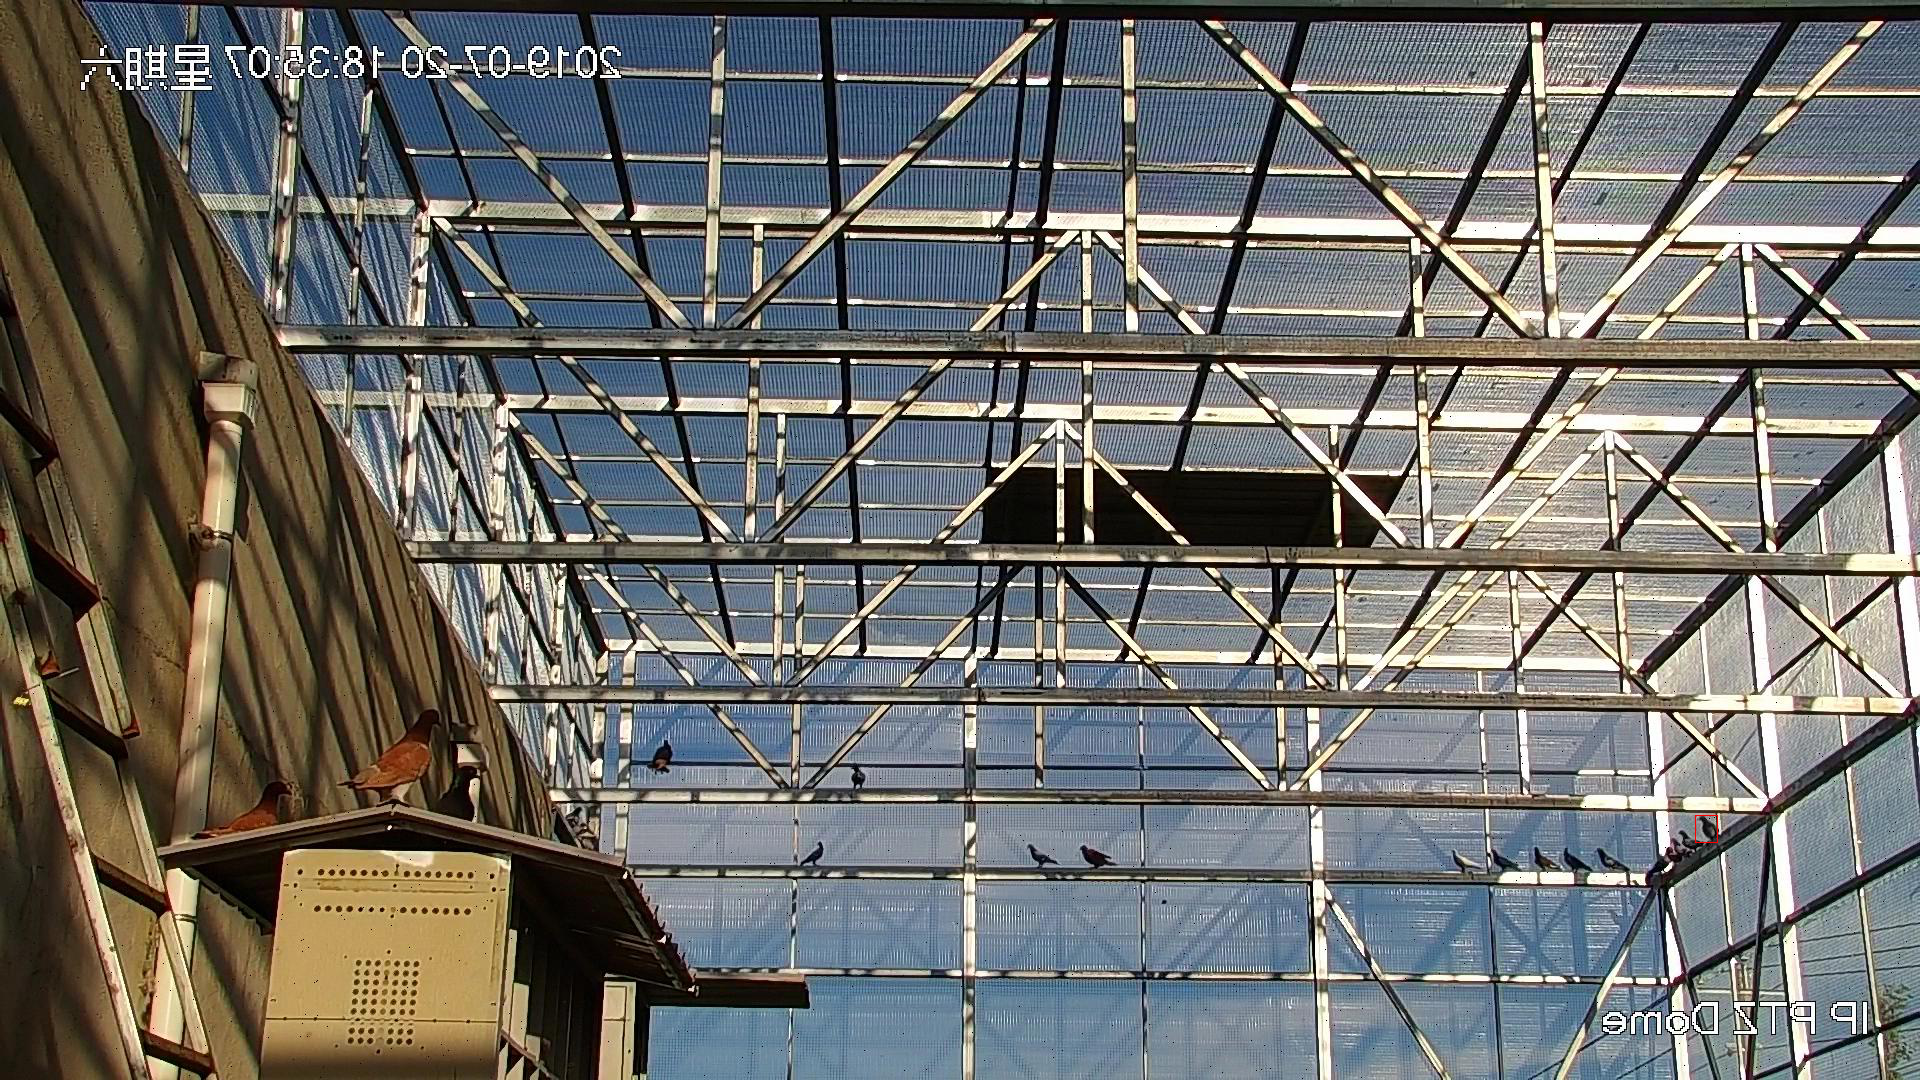

In [68]:
img